# Thesis Plots

Spencer Everett, 6/6/2016

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Utilities:
import numpy as np
import scipy as sp
import os,sys
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import download_file
from wcsaxes import datasets
import copy
%matplotlib inline

/home/spencer/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
from pangloss import *

In [4]:
# Turn on for verbose
vb = True

# Turn on for pickling correlation data
pickle = False

# Turn on for relevance plots
rel_plots = True

# Turn on for smooth-component correction plots
smooth_plots = True

# Turn on for plotting correlation function plots
corr_plots = True

# Turn on for plotting correlation function comparrison plots for relevant halos
rel_compare = True

# Turn on for plotting correlation function comparrison plots for smooth-component correction
smooth_compare = False

# Turn on for plotting maps
maps = True

In [5]:
K = Kappamap(kappafile=PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)
S = Shearmap(shearfiles=[PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

['/home/spencer/Documents/Pangloss/calib/Millennium/catalog_example.txt']
['/home/spencer/Documents/Pangloss/calib/Millennium/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits']


In [6]:
# Can pick one of the domains below
#d = [2.,1.,-2.,-1.]
#d = [1.,0.,-1.,0.]
#d = [1.85,1.15,-1.85,-1.15]
#d = [1.75,1.25,-1.75,-1.25]
#d = [1.65,1.35,-1.65,-1.35]
#d = [1.6,1.4,-1.6,-1.4] # 1440 galaxies
#d = [1.55,1.45,-1.55,-1.45]
d = [1.55,1.48,-1.55,-1.48] # 176 galaxies
#d = [1.20,1.15,-1.50,-1.45]
#d = [1.55,1.52,-1.61,-1.59] # only galaxies in subplot
#d = [1.55,1.54,-1.61,-1.6] # ~3 galaxies

# Lens the background catalog by map
if vb is True: print('Lensing background by map...')
B = pangloss.BackgroundCatalog(N=10.0,sigma_e=0.01,domain=d,field=[0,0,0,0])
B.lens_by_map(K,S)
print 'Background catalog has',B.galaxy_count,'galaxies'

# Drill the lightcones
if vb is True: print('Drilling lightcones...')
lc_radius = 2.0
B.drill_lightcones(radius=lc_radius,foreground=F,save=False)

# Save copy of background lightcones for relevant halos:
if rel_compare is True: B_rel = copy.deepcopy(B)
# Save copy of background lightcones for smooth-comp correction halos:
if smooth_compare is True: B_smooth = copy.deepcopy(B)

# Calculate mean/std galaxies per lightcone
galaxy_counts = [lightcone.galaxy_count for lightcone in B.lightcones]
mean_galaxies = np.mean(galaxy_counts)
std_galaxies = np.std(galaxy_counts)
print 'Lightcones have {0:.2f} +/- {1:.2f} galaxies'.format(mean_galaxies,std_galaxies)

if vb is True: print('Lensing background by halos..')
relevance_lim = 0.0
#relevance_lim = 0.00001
smooth_corr = True
B.lens_by_halos(relevance_lim=relevance_lim,lookup_table=True,smooth_corr=smooth_corr)
print 'Lightcones have {0:.2f} +/- {1:.2f} relevant galaxies'.format(B.mean_relevant_halos,B.std_relevant_halos)

if rel_compare is True:
    # Lens the background catalog using only relevant foreground halos
    if vb is True: print('Lensing background by relevant halos..')
    relevance_lim2 = 0.00001 # ~60 galaxies/lightcone
    B_rel.lens_by_halos(relevance_lim=relevance_lim2,lookup_table=True,smooth_corr=smooth_corr)
    mean_rel =  B_rel.mean_relevant_halos
    std_rel = B_rel.std_relevant_halos
    print 'Lightcones have {0:.2f} +/- {1:.2f} relevant galaxies'.format(mean_rel,std_rel)

if smooth_compare is True:
    # Lens the background catalog using smooth-component correction
    if vb is True: print('Lensing background with smooth-component correction..')
    B_smooth.lens_by_halos(relevance_lim=relevance_lim,lookup_table=True,smooth_corr=smooth_corr)

Lensing background by map...
Background catalog has 176 galaxies
Drilling lightcones...
0   0.0 %
18   10.0 %
36   20.0 %
54   30.0 %
72   40.0 %
90   51.0 %
108   61.0 %
126   71.0 %
144   81.0 %
162   92.0 %
Lightcones have 486.04 +/- 39.85 galaxies
Lensing background by halos..
0   0.0 %
18   10.0 %
36   20.0 %
54   30.0 %
72   40.0 %
90   51.0 %
108   61.0 %
126   71.0 %
144   81.0 %
162   92.0 %
average CPU time per background galaxy:  0.0893911678683 +/- 0.0116748828508
Lightcones have 486.04 +/- 39.85 relevant galaxies
Lensing background by relevant halos..
0   0.0 %
18   10.0 %
36   20.0 %
54   30.0 %
72   40.0 %
90   51.0 %
108   61.0 %
126   71.0 %
144   81.0 %
162   92.0 %
average CPU time per background galaxy:  0.0852684459903 +/- 0.00548143846272
Lightcones have 51.64 +/- 8.34 relevant galaxies


## Relevance and Smooth-Component Correction Plots

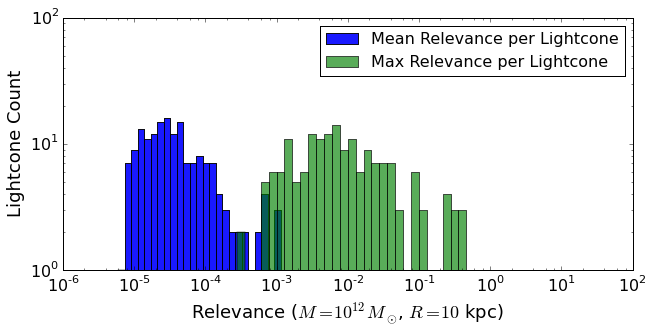

In [7]:
# Plot 'relevance' distribution
if relevance_lim == 0.0 and rel_plots is True:
    mean_relevance = [np.mean(lightcone.galaxies['relevance']) for lightcone in B.lightcones]
    max_relevance = [np.max(lightcone.galaxies['relevance']) for lightcone in B.lightcones]
    
    #plt.subplot(1, 2, 1)
    plt.hist(mean_relevance,label='Mean Relevance per Lightcone',alpha=0.9,log=True,bins=(10**np.linspace(np.log10(np.min(mean_relevance)),np.log10(np.max(mean_relevance)),50)))
    plt.hist(max_relevance,label='Max Relevance per Lightcone',facecolor='green',alpha=0.65,log=True,bins=(10**np.linspace(np.log10(np.min(max_relevance)),np.log10(np.max(max_relevance)),50)))
    plt.gca().set_xscale("log")
    plt.xlabel(r'Relevance ($M=10^{12}M_\odot$, $R=10$ kpc)',fontsize=18)
    #plt.xlabel('Mean Relevance per Lightcone',fontsize=18)
    plt.ylabel('Lightcone Count'.format(B.galaxy_count),fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.legend(fontsize=16)
    
    '''
    plt.subplot(1, 2, 2)
    max_relevance = [np.max(lightcone.galaxies['relevance']) for lightcone in B.lightcones]
    plt.hist(max_relevance,alpha=0.75,log=True,bins=(10**np.linspace(np.log10(np.min(max_relevance)),np.log10(np.max(max_relevance)),50)))
    plt.gca().set_xscale("log")
    plt.xlabel('Max Relevance per Lightcone',fontsize=18)
    plt.ylabel('Lightcone Count'.format(B.galaxy_count),fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    '''
    
    plt.gcf().tight_layout()
    plt.gcf().set_size_inches(10,5)

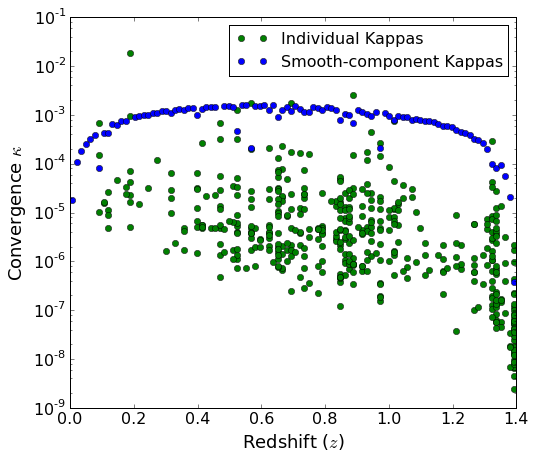

In [21]:
# Plot smooth-component correction densities and contributtions
if smooth_plots is True:
    lc = B.lightcones[np.random.randint(0,B.galaxy_count)]
    lc.plot_kappas(show=False)
    
plt.gcf().set_size_inches(8,7)

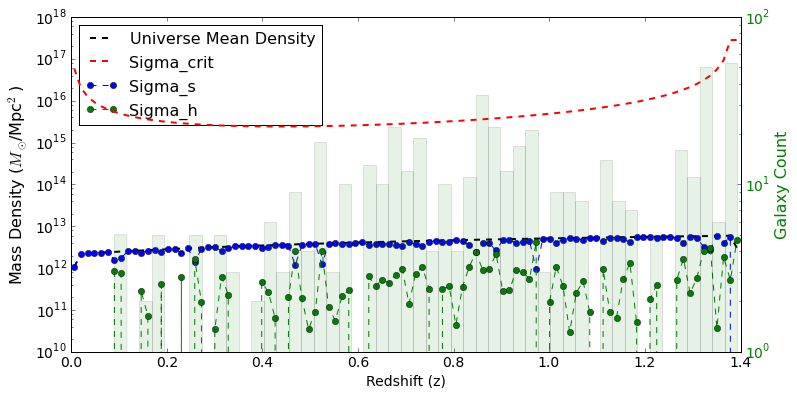

In [9]:
# Plot smooth-component correction densities
if smooth_plots is True:
    lc = B.lightcones[np.random.randint(0,B.galaxy_count)]
    pangloss.plotting.plot_densities(F,lc,density_type='surface',show=False,label=False)
    
plt.gcf().set_size_inches(12,6)

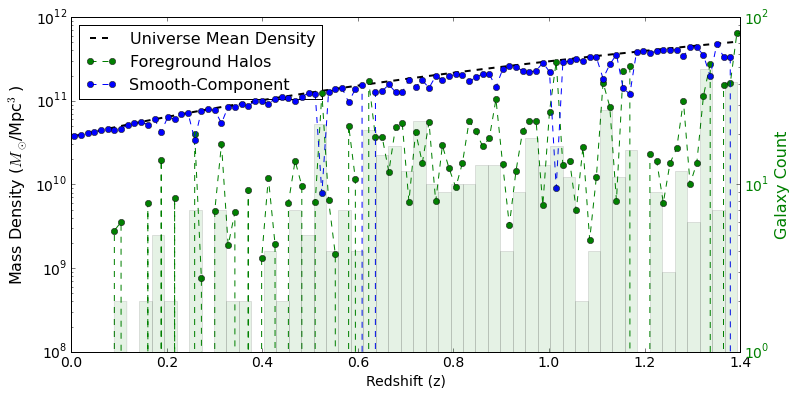

In [10]:
# Plot smooth-component correction densities
if smooth_plots is True:
    lc = B.lightcones[np.random.randint(0,B.galaxy_count)]
    pangloss.plotting.plot_densities(F,lc,density_type='volume',show=False,label=False)
    
plt.gcf().set_size_inches(12,6)

## Correlation Functions

Calculating correlation...


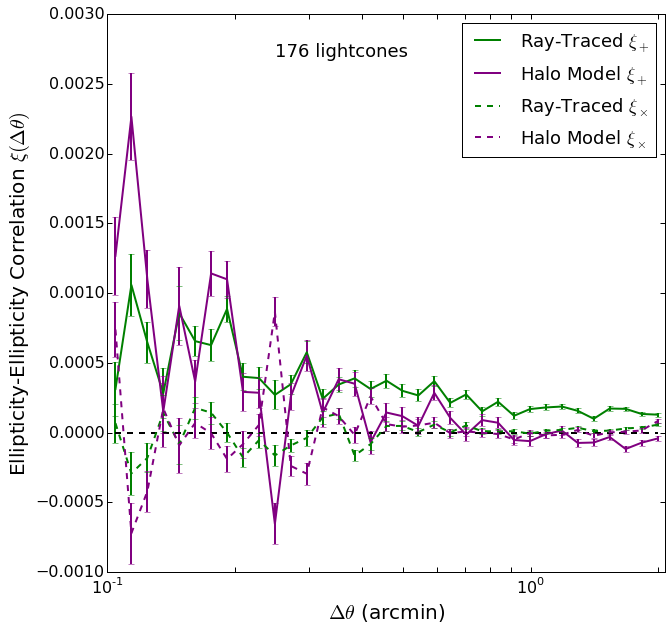

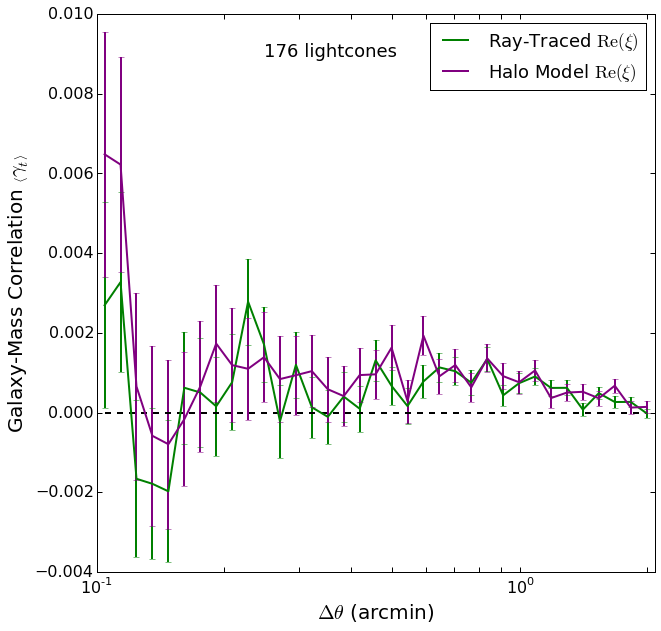

In [11]:
if corr_plots is True:
    # Calculate the correlation function for each lensing type
    if vb is True: print('Calculating correlation...')
    gg_map = B.calculate_corr(corr_type='gg',lensed='map',foreground=F)
    gg_halo = B.calculate_corr(corr_type='gg',lensed='halo',foreground=F)
    ng_map = B.calculate_corr(corr_type='ng',lensed='map',foreground=F)
    ng_halo = B.calculate_corr(corr_type='ng',lensed='halo',foreground=F)

    if rel_compare is True:
        # Calculate the correlation function using only most relevant halos
        gg_halo_r = B_rel.calculate_corr(corr_type='gg',lensed='halo',foreground=F)
        ng_halo_r = B_rel.calculate_corr(corr_type='ng',lensed='halo',foreground=F)

    if smooth_compare is True:
        # Calculate the correlation function using the smooth-component correction
        gg_halo_s = B_smooth.calculate_corr(corr_type='gg',lensed='halo',foreground=F)
        ng_halo_s = B_smooth.calculate_corr(corr_type='ng',lensed='halo',foreground=F)

    # Plot the correlation functions
    pangloss.plotting.plot_corr(gg_map,corr_type='gg',corr_comp='plus',lensed='map',color='green',galaxy_count=B.galaxy_count)
    pangloss.plotting.plot_corr(gg_halo,corr_type='gg',corr_comp='plus',lensed='halo',color='purple')
    pangloss.plotting.plot_corr(gg_map,corr_type='gg',corr_comp='cross',lensed='map',color='green')
    pangloss.plotting.plot_corr(gg_halo,corr_type='gg',corr_comp='cross',lensed='halo',color='purple')
    plt.gcf().set_size_inches(10,10)
    plt.show()

    pangloss.plotting.plot_corr(ng_map,corr_type='ng',corr_comp='real',lensed='map',color='green',galaxy_count=B.galaxy_count)
    pangloss.plotting.plot_corr(ng_halo,corr_type='ng',corr_comp='real',lensed='halo',color='purple')
    plt.gcf().set_size_inches(10,10)
    plt.show()

Ellipticity-Ellipticity correlation difference intrinsic to mapped: chi^2:  584.760850469 n_sigma:  25.8316701725 percent_err:  106.681604852 +\- 0.134942804736
Galaxy-Galaxy correlation difference intrinsic to mapped: chi^2:  22.3457569052 n_sigma:  -1.68142907753 percent_err:  204.50454267 +\- 0.406302401067
Comparing correlations (rel)...


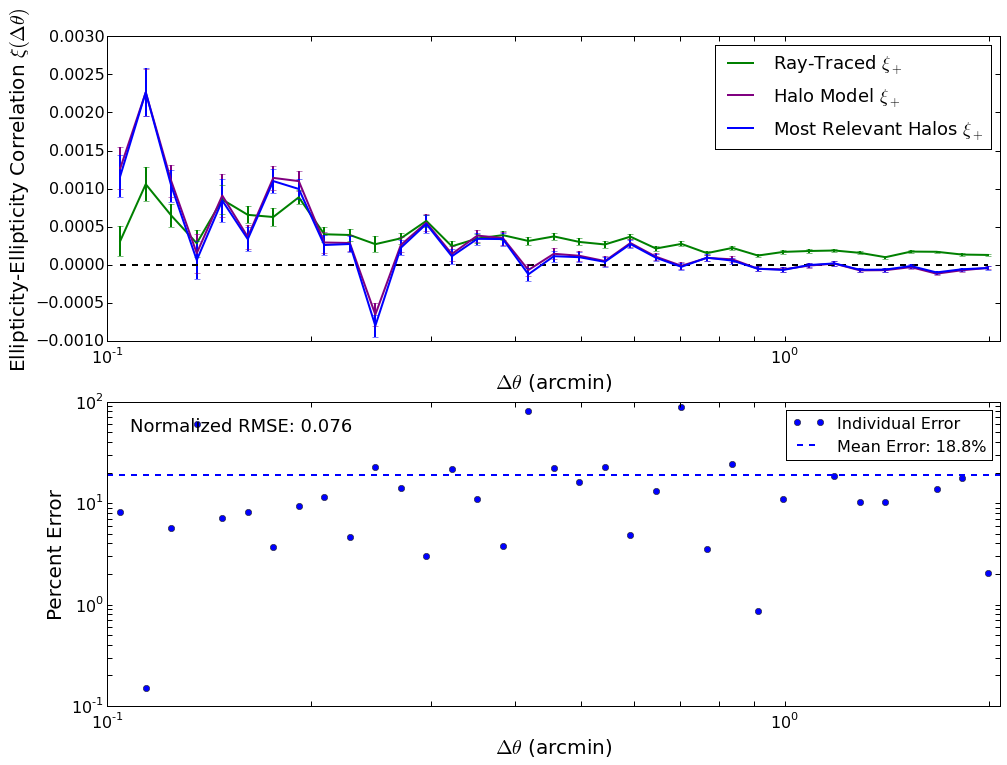

In [12]:
if corr_plots is True:
    # Compare the correlation functions
    chi2,n_sigma,percent_err,std_err = B.compare_corr(gg_halo,gg_map,corr_type='gg',corr_comp='plus')
    print 'Ellipticity-Ellipticity correlation difference intrinsic to mapped:','chi^2: ',chi2,'n_sigma: ',n_sigma,'percent_err: ',percent_err,'+\-',std_err

    chi2,n_sigma,percent_err,std_err = B.compare_corr(ng_halo,ng_map,corr_type='ng',corr_comp='real')
    print 'Galaxy-Galaxy correlation difference intrinsic to mapped:','chi^2: ',chi2,'n_sigma: ',n_sigma,'percent_err: ',percent_err,'+\-',std_err

    if rel_compare is True:
        # Compare the correlations for intrinsic, halos, and relevant halos
        if vb is True: print('Comparing correlations (rel)...')
        #pangloss.plotting.compare_relevant_halos(gg_map,gg_halo,gg_halo_r,corr_type='gg',galaxy_count=B.galaxy_count,radius=lc_radius,rel_halos=[mean_rel,std_rel],fig_size=10,show=False)
        pangloss.plotting.compare_relevant_halos(gg_map,gg_halo,gg_halo_r,corr_type='gg',fig_size=10,show=False)
        plt.gcf().set_size_inches(16,12)

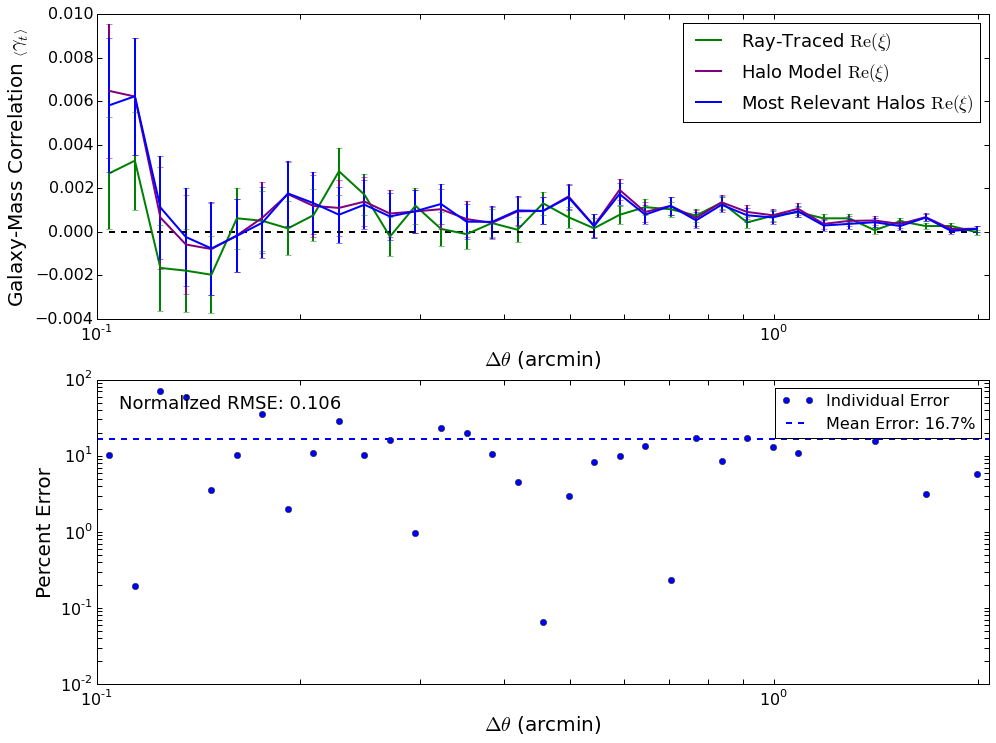

In [13]:
if corr_plots is True:
    if rel_compare is True:
        pangloss.plotting.compare_relevant_halos(ng_map,ng_halo,ng_halo_r,corr_type='ng',fig_size=10,show=False)
        #pangloss.plotting.compare_relevant_halos(ng_map,ng_halo,ng_halo_r,corr_type='ng',galaxy_count=B.galaxy_count,radius=lc_radius,rel_halos=[mean_rel,std_rel],fig_size=10,show=False)        
        plt.gcf().set_size_inches(16,12)

In [14]:
if corr_plots is True:
    if smooth_compare is True:
        # Compare the correlations for intrinsic, halos, and halos with smooth-component correction
        if vb is True: print('Comparing correlations (smooth)...')
        if rel_compare is False:
            mean_rel =  None
            std_rel = None
        pangloss.plotting.compare_smooth_component(gg_map,gg_halo,gg_halo_s,corr_type='gg',galaxy_count=B.galaxy_count,radius=lc_radius,rel_halos=[mean_rel,std_rel])
        pangloss.plotting.compare_smooth_component(ng_map,ng_halo,ng_halo_s,corr_type='ng',galaxy_count=B.galaxy_count,radius=lc_radius,rel_halos=[mean_rel,std_rel])


## Maps

UnboundLocalError: local variable 'world' referenced before assignment

/home/spencer/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/spencer/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


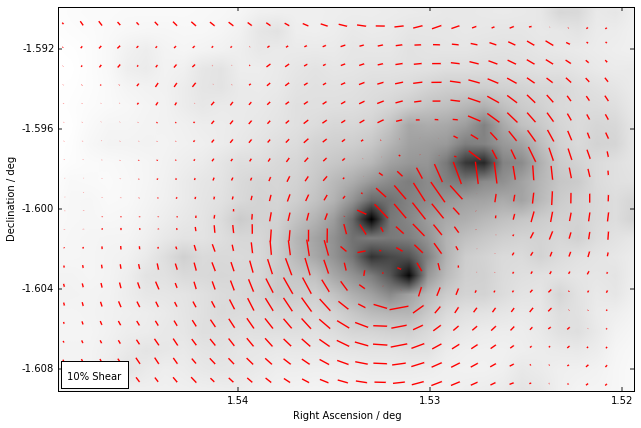

In [15]:
# Plot a map near a lens
if maps is True:
    K.plot(fig_size=10,subplot=[1.55,1.52,-1.61,-1.59])
    S.plot()
    B.plot(lensed='all',graph='stick')
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

For `kappamaps`, use `binmap_test.py` in `/tests`

## Lightcone Plot

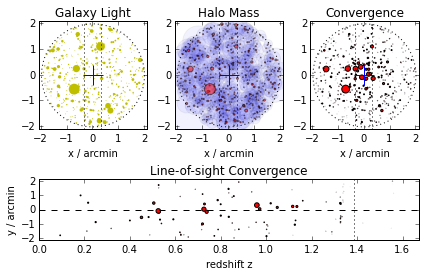

In [19]:
num = np.random.randint(0,B.galaxy_count)
lc = B.lightcones[num]

lc.plot(output='/home/spencer/Desktop/thesis_figures/lightcone_plots')
plt.gcf().tight_layout()
#plt.gcf().set_size_inches(8,12)